# **Khushdev Pandit**
# **Roll no: 2020211** 
# *Assignment Question-2*

In [1]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import torch.nn.functional as F
import cv2
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import pickle
from sklearn import manifold
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# **Q2 Part-1**


## **2(a)** *Download the training files. Use 20% of the training dataset for validation and 10% for testing. Initialize Weights & Biases (WandB).*

In [29]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
path_data_img = "/content/drive/MyDrive/ECE344: CV (Computer Vision)/Assignments/Assignment-1/Q2/images"
path_data_mask = "/content/drive/MyDrive/ECE344: CV (Computer Vision)/Assignments/Assignment-1/Q2/masks"
path_data_img = "VOC Segmentation Dataset\images"
path_data_mask = "VOC Segmentation Dataset\masks"
print(len(os.listdir(path_data_img)))
print(len(os.listdir(path_data_mask)))

1464
1464


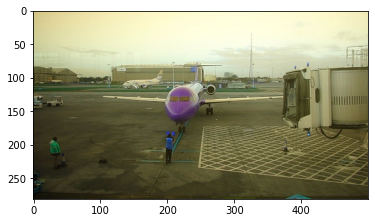

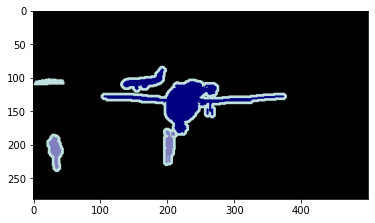

In [23]:
img = cv2.imread(os.path.join(path_data_img, os.listdir(path_data_img)[0]))
mask = cv2.imread(os.path.join(path_data_mask, os.listdir(path_data_mask)[0]))
plt.imshow(img);
plt.show()
plt.imshow(mask);
plt.show()

In [16]:
images, masks = [], []
for i, img_file in enumerate(os.listdir(path_data_img)):
    images.append(plt.imread(os.path.join(path_data_img, img_file)))
    mask_file = img_file[:-4]+'.png'
    masks.append(plt.imread(os.path.join(path_data_mask, mask_file)))

In [36]:
print(len(images), len(masks))

1464 1464


In [41]:
images[1].shape

(375, 500, 3)

In [39]:
images = torch.tensor(images)
masks = np.array(masks)

C:\Users\khush\AppData\Local\Temp\ipykernel_16980\1739918911.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  images = torch.tensor(images)


ValueError: expected sequence of length 281 at dim 1 (got 375)

In [25]:
np.unique(mask)

array([  0, 128, 192, 224], dtype=uint8)